In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Follow the [TensorFlow tutorial](https://www.tensorflow.org/tutorials/keras/classification) to build a dense network for classifying the fashion-MNIST dataset.

In [5]:
print(tf.__version__)

2.5.0


In [8]:
#loads the data and returns four numpy arrays
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
#labels for each image
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
#number of images, and pixels (60,000 images, 28x28 pixels)
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
#number of images in the test set
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

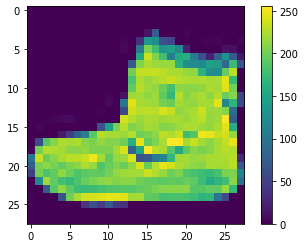

In [16]:
#data must be preprocessed, pixel values fall in the range 0 to 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
#scales teh values to range of 0 to 1
train_images = train_images / 255.0

test_images = test_images / 255.0

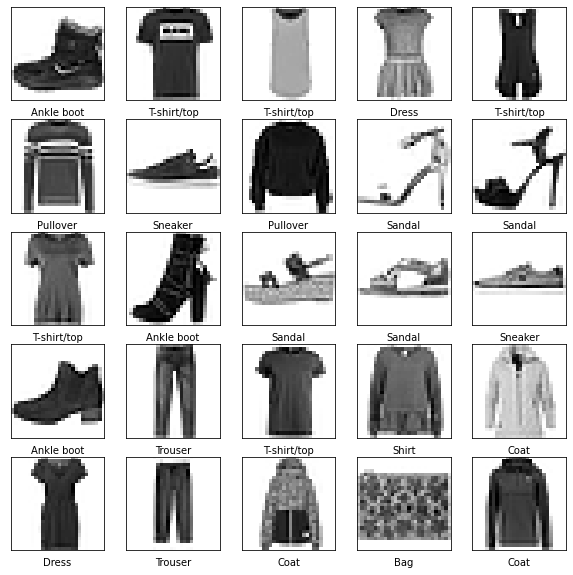

In [18]:
#displays the frist 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
#Building the model
#Setting up the layers
#flatten - transforms the format of tge image from a two dimensional to a one dimensional array (doesn't train just transforms the data) 
#layers - the network consists of a sequence of two layers, either densely connected, or fully oconncected, neural layers.
#(The first dense layer has 128 nodes).
#the second dense layer returns a logits array with length of 10, each node contains a score that indicates 
#the current image belongs to each one of the 10 classes.


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [20]:
#compile the model
#Loss function - measures how accurate the model is during training
#Optimizer - how the model is updated based on the data it sees and its loss function
#Metrices - used to monitor the training and testing steps. 

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
#Train the model
#Steps:
#Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
#The model learns to associate images and labels.
#You ask the model to make predictions about a test set—in this example, the test_images array.
#Verify that the predictions match the labels from the test_labels array.

model.fit(train_images, train_labels, epochs=10)


2022-10-03 15:43:35.003874: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-03 15:43:35.015623: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2300000000 Hz


Epoch 1/10
1875/1875 [==============================] - 2s 918us/step - loss: 0.5001 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 2s 919us/step - loss: 0.3753 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 2s 910us/step - loss: 0.3356 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.3113 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 2s 937us/step - loss: 0.2938 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 2s 913us/step - loss: 0.2786 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 2s 914us/step - loss: 0.2666 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 2s 913us/step - loss: 0.2563 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 2s 922us/step - loss: 0.2454 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 2s 909u

In [22]:
#Evaluating accuracy 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3526 - accuracy: 0.8788

Test accuracy: 0.8787999749183655


In [23]:
#Predictions 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [24]:
predictions = probability_model.predict(test_images)

In [25]:
predictions[0]

array([4.7821283e-07, 1.0893096e-09, 1.7415888e-09, 5.3319277e-10,
       5.1797162e-09, 9.2628157e-05, 2.3822091e-09, 1.1436535e-03,
       7.1522592e-08, 9.9876320e-01], dtype=float32)

In [28]:
#prediction label with the highest confidence 
np.argmax(predictions[0])

9

In [27]:
#checks with the test_label
test_labels[0]

9

In [30]:
#looks at the full set of 10 class predictions 
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

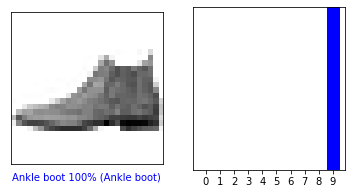

In [31]:
#verify predictions 
#Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

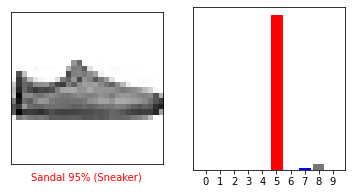

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

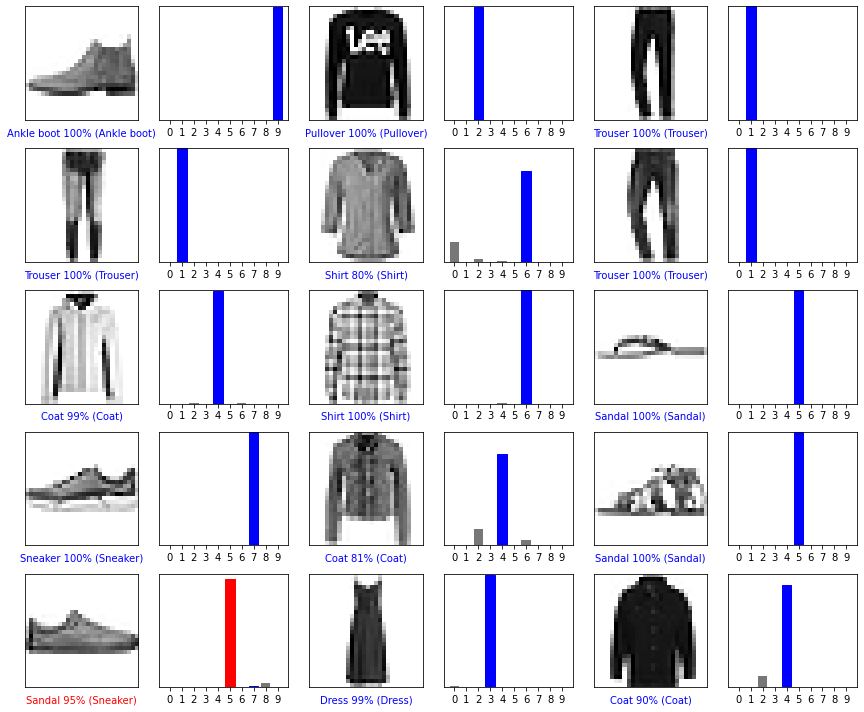

In [34]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [35]:
#using the trained model 
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [36]:
# Add the image to a batch where it's the only member.
#tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [37]:
#predicting the correct label
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.2033310e-05 9.1450262e-16 9.9780470e-01 3.0396709e-11 2.1115316e-03
  1.3008503e-17 6.1732804e-05 3.4460661e-27 7.8969001e-12 5.4959156e-16]]


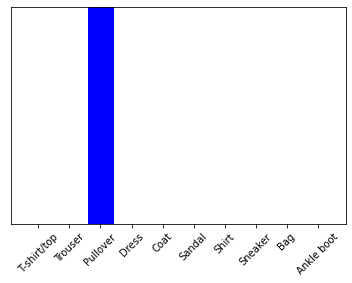

In [38]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [39]:
#tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch.
np.argmax(predictions_single[0])

2